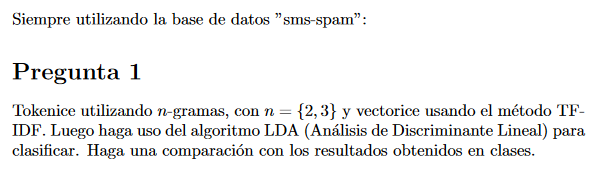

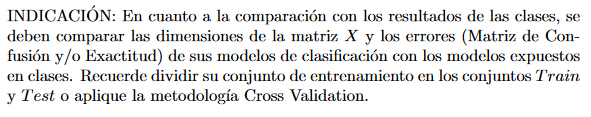

In [1]:
from nltk.util import ngrams
from nltk.tokenize.casual import casual_tokenize

import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

puntuacion = set((',', '.', '--', '-', '¡', '!', '¿', '?', ':', ';', '``', "''", '(', ')', '[', ']', '«',
                  '»', '/', '—', '_', '..', '+', '…', '‘', '’', '–', '%', '“', '”', '″', '"', '·', '|',
                  '<', '>', '=', '*', '°'))

class n_gram_tokenizer:
    def __init__(self, n_order=2):
        self.n_order = n_order
    
    def tokenize(self, document):
        tokens = casual_tokenize(document.lower())
        
        # Eliminamos stopwords
        tokens = [x for x in tokens if x not in stopwords]
        # Eliminamos puntuacion
        tokens = [x for x in tokens if x not in puntuacion]
        
        #lista de ngramas, en cada ngrama hay una tupla que contiene sus tokens
        n_grams = list(ngrams(tokens, self.n_order))
        n_grams = [" ".join(x) for x in n_grams]
    
        return n_grams


[nltk_data] Downloading package stopwords to
[nltk_data]     D:\Users\Memo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from collections import Counter
from collections import OrderedDict
import copy
import math

def tf_idf_vectorizer(corpus, tokenizer):
    '''
    Funcion que realiza vectorizacion TF-IDF
    Entradas:
        Corpus es una lista de documentos, que a su ves, son listas de una palabra.
        Tokenizer es una funcion, que toma un documento y entrega una lista de tokens.
    Salida:
        Diccionario ordenado, en la cual se le asigna a cada token un numero.
    '''
    
    tokens_in_doc = []
    num_tokens_in_doc = []

    for doc in corpus:
        tokens = tokenizacion(doc)
        token_counts = Counter(tokens)
        tokens_in_doc.append(tokens)
        num_tokens_in_doc.append(len(token_counts))
        
    # Todos los token de los docs
    all_doc_tokens = sum(tokens_in_doc, [])
    # Léxico
    lexicon = sorted(set(all_doc_tokens))
    
    # Diccionario que contiene en cuantos documentos aparece cada token
    num_documents_containing_token = {}
    for token in lexicon:
        containing_token = 0
        for i, doc in enumerate(docs):
            if token in tokens_in_doc[i]:
                containing_token += 1
        num_documents_containing_token.update({token : containing_token})
    
    # Calculo TF-IDF
    tfidf_vectors = []
    zero_vector = OrderedDict((token, 0) for token in lexicon)
    for i, doc in enumerate(corpus):
        vec = copy.copy(zero_vector)
        tokens = tokenizacion(doc)
        token_counts = Counter(tokens)
        for token, value in token_counts.items():
            tf = value / num_tokens_in_doc[i]
            idf = len(docs) / num_documents_containing_token[token]
            vec[token] = tf* math.log(idf)
        tfidf_vectors.append(vec)
    
    return tfidf_vectors

In [3]:
# Definimos la funcion para analisis de discriminacion lineal (LDA)
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

def LDA_recta(vector, label):
    '''
    Funcion que calcula la recta que une los centroides,
    Entradas:
        vector: array en el que sus filas son vectores, a los cuales se les calculará dos centroides
        label : array de booleanos, que categoriza a cada vector
    Salida:
        recta : array con dimension igual a los vectores a categorizar
    '''
    #Calculamos los centroides en las dimensiones de los tokens de entrenamiento
    centroid = vector[label].mean(axis=0)
    n_centroid = vector[~label].mean(axis=0)
    
    #vector recta, que une los dos centroides
    recta = centroid - n_centroid
    
    return recta
    
def lda_matriz_confusion(recta, vector, label, threshold=0.5):
    '''
    Funcion que calcula la matriz de confusion y la precision del metodo LDA 
    Entradas:
        recta : la recta que discrimina los vectores
        vector: array en el que sus filas son vectores, los cuales se discriminarán
        label : array de booleanos, que categoriza a cada vector, se usa para discernir falsas discriminaciones (FP, FN)
        threshold: tolerancia de discriminacion
    '''
    score = vector.dot(recta)

    lda_score = MinMaxScaler().fit_transform(score.reshape(-1,1))
    
    #Si el score es mayor al threshold, entonces se discrimina
    predict = (lda_score > threshold).astype(int)

    label = np.array([int(x == True) for x in label])

    df = pd.DataFrame(data={'label': label, 
                            'lda_predict': predict.reshape(-1,), 
                            'lda_score': lda_score.reshape(-1,)})
    
    matrix = confusion_matrix(label, predict)
    
    print(f"Verdaderos Positivos: {matrix[0][0]} no son spam y se clasificaron como no spam")
    print(f"Verdaderos Negativos: {matrix[1][1]} son spam y se clasificaron como spam")
    print(f"Falsos     Negativos: {matrix[0][1]} no son spam y se clasificaron como spam")
    print(f"Falsos     Positivos: {matrix[1][0]} son spam y se clasificaron como no spam")

    acc = (matrix[0][0] + matrix[1][1])/sum(sum(matrix))
    print(f"Con una precision de {acc}")

In [5]:
from nlpia.data.loaders import get_data
import pandas as pd

#Esta línea ayuda a mostrar la columna ancha de texto SMS dentro de una impresión de Pandas DataFrame.
pd.options.display.width = 120
sms = get_data('sms-spam')
sms

d:\program files\python37\lib\site-packages\pugnlp\constants.py:136: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  [datetime.datetime, pd.datetime, pd.Timestamp])
d:\program files\python37\lib\site-packages\pugnlp\constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')
d:\program files\python37\lib\site-packages\pugnlp\tutil.py:100: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
d:\program files\python37\lib\site-packages\pugnlp\util.py:80: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
INFO:nlpia.constants:Sta

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
4832,1,This is the 2nd time we have tried 2 contact u...
4833,0,Will ü b going to esplanade fr home?
4834,0,"Pity, * was in mood for that. So...any other s..."
4835,0,The guy did some bitching but I acted like i'd...


In [6]:
# Alternativamente al metodo de tf_idf_vectorizer, se puede utilizar libreria sklearn y utilizador TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tokenizacion = n_gram_tokenizer(n_order=2).tokenize

tfidf_model = TfidfVectorizer(tokenizer=tokenizacion)
tfidf_docs = tfidf_model.fit_transform(raw_documents=sms.text).toarray()

#Cada fila representa un documento y
#cada columna representa un token del corpus
#su valor representara el valor de TF-IDF
print(tfidf_docs.shape)
tfidf_docs

NameError: name 'tokenizacion' is not defined

In [23]:
#Iniciaremos un vector para mostrar con True or False, para ver si un documento es spam o no.
spam_labels = sms.spam.astype(bool).values
spam_labels

array([False, False,  True, ..., False, False, False])

In [24]:
#Separamos el conjunto de datos en un set de entrenamiento y otro set de teste
from sklearn.model_selection import train_test_split
vector_train, vector_test, label_train, label_test = train_test_split(tfidf_docs , spam_labels, test_size=0.5,random_state=5)

In [25]:
#Luego, calculamos el centroide en las dimensiones de los tokens de entrenamiento
spam_centroid = vector_train[label_train].mean(axis=0)
nspam_centroid = vector_train[~label_train].mean(axis=0)

In [26]:
spam_centroid.shape

(35613,)

In [27]:
import numpy as np

#vector recta, que une los dos centroides
recta = spam_centroid-nspam_centroid
print(recta)
recta.shape

[-0.00017125  0.          0.00063621 ...  0.          0.
  0.        ]


Con la recta calculada, podemos ver la matriz de confusion para el set de entrenamiento

In [28]:
#Calculamos el producto punto entre cada documento y la recta
spaminess_score = vector_train.dot(recta)

#Reescalaremos, en base al minimo y al máximo, el "spaminess_score" entre 0 y 1
from sklearn.preprocessing import MinMaxScaler

lda_score = MinMaxScaler().fit_transform(spaminess_score.reshape(-1,1))
#Si el score es mayor a 0.5, entonces lo clasificaremos como spam.
lda_predict = (lda_score > .5).astype(int)

label_train = np.array([int(x == True) for x in label_train])

df = pd.DataFrame(data={'label': label_train, 
                        'lda_predict': lda_predict.reshape(-1,), 
                        'lda_score': lda_score.reshape(-1,)})
df.round(2).head(15)

,label,lda_predict,lda_score
0,0,0,0.19
1,0,0,0.20
2,0,0,0.20
3,0,0,0.20
4,0,0,0.20
5,0,0,0.20
6,0,0,0.18
7,0,0,0.20
8,0,0,0.19
9,0,0,0.20


## Matriz de confusion

In [34]:
from sklearn.metrics import confusion_matrix

y_real = df.label
y_pred = df.lda_predict
matrix = confusion_matrix(y_real, y_pred)
matrix

array([[2115,    0],
       [ 220,   83]], dtype=int64)

In [30]:
print(f"Verdaderos Positivos: {matrix[0][0]} no son spam y se clasificaron como no spam")
print(f"Verdaderos Negativos: {matrix[1][1]} son spam y se clasificaron como spam")
print(f"Falsos     Negativos: {matrix[0][1]} no son spam y se clasificaron como spam")
print(f"Falsos     Positivos: {matrix[1][0]} son spam y se clasificaron como no spam")

acc = (matrix[0][0] + matrix[1][1])/sum(sum(matrix))
print(f"Con una precision de {acc}")

Verdaderos Positivos: 2115 no son spam y se clasificaron como no spam
Verdaderos Negativos: 83 son spam y se clasificaron como spam
Falsos     Negativos: 0 no son spam y se clasificaron como spam
Falsos     Positivos: 220 son spam y se clasificaron como no spam
Con una precision de 0.9090157154673284


In [4]:


recta = LDA_recta(vector_test, label_test)
lda_matriz_confusion(recta, vector_test, label_test, threshold=0.5)

NameError: name 'vector_test' is not defined